# Credit Data - Feature Engineering
## Author: Alex Davis
## Date: 01/22/2024

The purpose of the script is to conduct feature engineering tasks, such as encoding, to select the appropiate inputs that will be used to build a classifiaction algorithm. This script will include both some feature engineering and feature selection.

## Import Packages

In [1]:
#packages for data manipulation
import pandas as pd

#packages for data visualization
import matplotlib as plt
import seaborn as sns

#packages for feature engineering
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Import Data

In [2]:
#import preprocessed dataset
data = pd.read_csv("data/credit_data_preprocessed.csv")

In [3]:
#view the first 5 rows of the dataset
data.head()

,Customer_ID,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,...,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score,Age,Monthly_Inhand_Salary,Avg_Num_of_Delayed_Payment,Num_Credit_Inquiries,Years_of_Credit,Credit_Mix
0,CUS_0xd40,1911412.0,3,4,3,4,3,11.27,80998.0,26.822620,...,49.574949,8.041530e+09,3.124941e+09,Good,23,1824.843333,6.0,4,22,Good
1,CUS_0xd40,1911412.0,3,4,3,4,-1,11.27,80998.0,31.944960,...,49.574949,1.182802e+09,2.846292e+09,Good,23,1824.843333,6.0,4,22,Good
2,CUS_0xd40,1911412.0,3,4,3,4,3,0.00,80998.0,28.609352,...,49.574949,8.169952e+09,3.312099e+09,Good,23,1824.843333,6.0,4,22,Good
3,CUS_0xd40,1911412.0,3,4,3,4,5,6.27,80998.0,31.377862,...,49.574949,1.994581e+09,2.234513e+09,Good,23,1824.843333,6.0,4,22,Good
4,CUS_0xd40,1911412.0,3,4,3,4,6,11.27,80998.0,24.797347,...,49.574949,4.142015e+09,3.414892e+08,Good,23,1824.843333,6.0,4,22,Good


## Feature Engineering

In this section we will handle categorical variables through one-hot encoding, creating new variables. 

### Encoding Categorical Variables

We have two potential input variables that are categorical, Payment_of_Min_Amount and Credit_Mix. We will use one-hot encoding to represent them as binary variables (1 or 0).

In [4]:
#view the possible values of the categorical variables
print(data["Payment_of_Min_Amount"].value_counts())
print(data["Credit_Mix"].value_counts())

Payment_of_Min_Amount
Yes    41295
No     31163
NM      9927
Name: count, dtype: int64
Credit_Mix
Standard    37253
Good        26632
Bad         18500
Name: count, dtype: int64


In [5]:
#create a dataframe with one-hot encoded data
encoded_data = pd.get_dummies(data, columns = ["Payment_of_Min_Amount","Credit_Mix"], dtype = int)

#view encoded dataframe
encoded_data.head()

,Customer_ID,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,...,Monthly_Inhand_Salary,Avg_Num_of_Delayed_Payment,Num_Credit_Inquiries,Years_of_Credit,Payment_of_Min_Amount_NM,Payment_of_Min_Amount_No,Payment_of_Min_Amount_Yes,Credit_Mix_Bad,Credit_Mix_Good,Credit_Mix_Standard
0,CUS_0xd40,1911412.0,3,4,3,4,3,11.27,80998.0,26.822620,...,1824.843333,6.0,4,22,0,1,0,0,1,0
1,CUS_0xd40,1911412.0,3,4,3,4,-1,11.27,80998.0,31.944960,...,1824.843333,6.0,4,22,0,1,0,0,1,0
2,CUS_0xd40,1911412.0,3,4,3,4,3,0.00,80998.0,28.609352,...,1824.843333,6.0,4,22,0,1,0,0,1,0
3,CUS_0xd40,1911412.0,3,4,3,4,5,6.27,80998.0,31.377862,...,1824.843333,6.0,4,22,0,1,0,0,1,0
4,CUS_0xd40,1911412.0,3,4,3,4,6,11.27,80998.0,24.797347,...,1824.843333,6.0,4,22,0,1,0,0,1,0


In [6]:
#Ensure that our dependent variable (Credit_Score) is our only non-quantitative field
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82385 entries, 0 to 82384
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Customer_ID                 82385 non-null  object 
 1   Annual_Income               82385 non-null  float64
 2   Num_Bank_Accounts           82385 non-null  int64  
 3   Num_Credit_Card             82385 non-null  int64  
 4   Interest_Rate               82385 non-null  int64  
 5   Num_of_Loan                 82385 non-null  int64  
 6   Delay_from_due_date         82385 non-null  int64  
 7   Changed_Credit_Limit        82385 non-null  float64
 8   Outstanding_Debt            82385 non-null  float64
 9   Credit_Utilization_Ratio    82385 non-null  float64
 10  Total_EMI_per_month         82385 non-null  float64
 11  Amount_invested_monthly     82385 non-null  float64
 12  Monthly_Balance             82385 non-null  float64
 13  Credit_Score                823

In [7]:
#we don't need the customer ID anymore
encoded_data = encoded_data.drop(columns = "Customer_ID")

## Feature Selection
While feature selection may also be done during model selection, or may not even be needed, we will see what we can easily eliminate to reduce complexity and increase interperetability.

### Multicollinearity
Now, we will test for multicollinearity. Since we are going to build a classification model that could be a random forest or boost model, multicollinearity won't affect our model's performance. Multicollinearity really only affects regression models. However, it is still good practice to investigate as, even if it does not affect the accuracy of our model, it always affects interperetability.

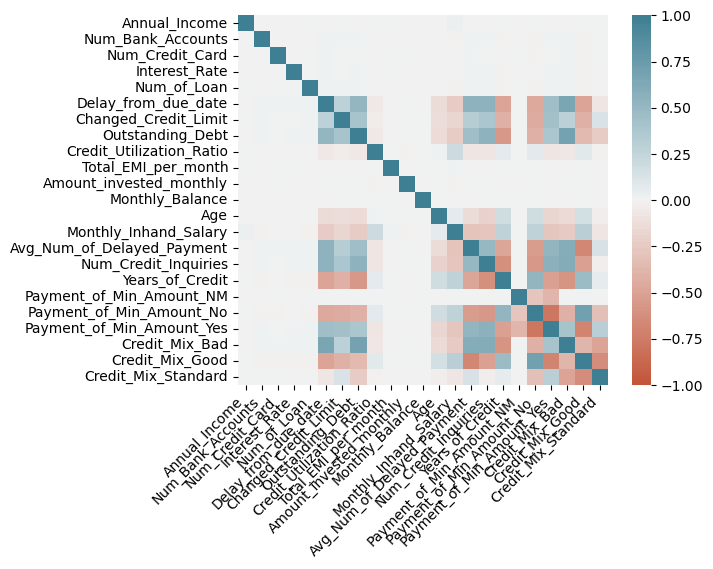

In [8]:
#create a dataframe with only inputs
model_inputs = encoded_data.drop(columns = "Credit_Score")

#first develop a correlation matrix
#this will be massive, but good to reference during our VIF analysis
ax = sns.heatmap(model_inputs.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [9]:
#conduct variance inflation factor analysis
#this function will take a dataframe as its input, and return a table of the input's fields and VIF scores
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [11]:
#apply calc_vif and print results sorted by VIF scores
#only foucs on the part of the heatmap that we see a lot of correlation
vif_scores = calc_vif(model_inputs.iloc[:,12:-1])
vif_scores.sort_values(by=['VIF'], ascending=False)

,variables,VIF
7,Payment_of_Min_Amount_Yes,23.443790
6,Payment_of_Min_Amount_No,20.620331
5,Payment_of_Min_Amount_NM,6.544565
9,Credit_Mix_Good,2.976261
2,Avg_Num_of_Delayed_Payment,2.404054
3,Num_Credit_Inquiries,2.185047
8,Credit_Mix_Bad,2.174714
4,Years_of_Credit,1.991889
1,Monthly_Inhand_Salary,1.147427
0,Age,1.053179


In [12]:
#payment_of_min_amount_yes and payment_of_min_amount_no are highly correlated (inverse)
#lets just drop the no and nm columns and only mark if they did pay the min amount
model_inputs = model_inputs.drop(columns = ["Payment_of_Min_Amount_No",
                                            "Payment_of_Min_Amount_NM"])

In [13]:
#recalculate VIF scores
vif_scores = calc_vif(model_inputs.iloc[:,12:-1])
vif_scores.sort_values(by=['VIF'], ascending=False)

,variables,VIF
0,Age,10.044412
2,Avg_Num_of_Delayed_Payment,9.863111
4,Years_of_Credit,8.230405
3,Num_Credit_Inquiries,5.574933
5,Payment_of_Min_Amount_Yes,3.994355
7,Credit_Mix_Good,3.303292
1,Monthly_Inhand_Salary,2.980217
6,Credit_Mix_Bad,2.791442


In [14]:
#looks like age and years_of_credit are correlated, let's just drop age and repeat
model_inputs = model_inputs.drop(columns = "Age")

vif_scores = calc_vif(model_inputs.iloc[:,12:-1])
vif_scores.sort_values(by=['VIF'], ascending=False)

,variables,VIF
1,Avg_Num_of_Delayed_Payment,8.759477
3,Years_of_Credit,6.824924
2,Num_Credit_Inquiries,5.417498
4,Payment_of_Min_Amount_Yes,3.921279
6,Credit_Mix_Good,3.010115
0,Monthly_Inhand_Salary,2.942619
5,Credit_Mix_Bad,2.782220


In [15]:
#there is also a lot of correlation with our credit mix columns so we will remove them
model_inputs = model_inputs.drop(columns = ["Credit_Mix_Bad",
                                           "Credit_Mix_Good",
                                           "Credit_Mix_Standard"])

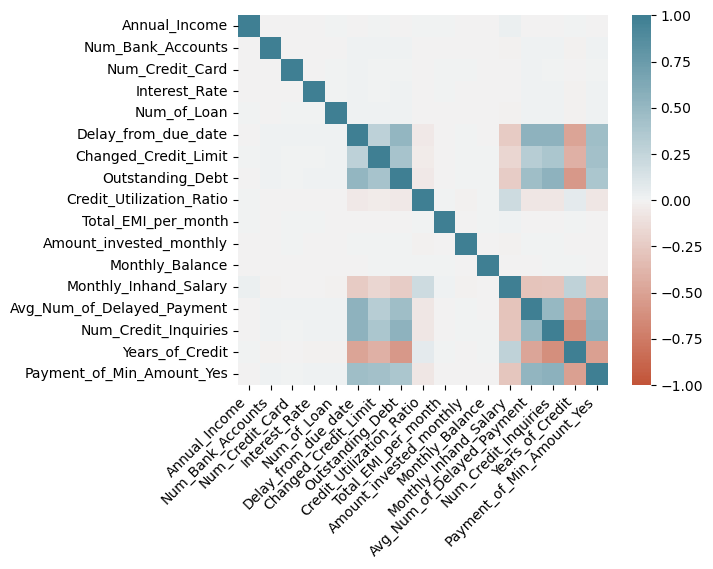

In [16]:
#looks like our VIF scores are improving, lets reproduce the correlation matrix
ax = sns.heatmap(model_inputs.corr(), vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [17]:
#there is still some multicollinearity going on, but that is ok since we are building a classification model
#we still improved the complexity and interperetability of the model

#create a dataframe with our model inputs and the dependent variable
data = encoded_data[['Annual_Income', 'Num_Bank_Accounts', 'Num_Credit_Card',
       'Interest_Rate', 'Num_of_Loan', 'Delay_from_due_date',
       'Changed_Credit_Limit', 'Outstanding_Debt', 'Credit_Utilization_Ratio',
       'Total_EMI_per_month', 'Amount_invested_monthly', 'Monthly_Balance',
       'Monthly_Inhand_Salary', 'Avg_Num_of_Delayed_Payment',
       'Num_Credit_Inquiries', 'Years_of_Credit', 'Payment_of_Min_Amount_Yes', 'Credit_Score']]

data.head()

,Annual_Income,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Delay_from_due_date,Changed_Credit_Limit,Outstanding_Debt,Credit_Utilization_Ratio,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Monthly_Inhand_Salary,Avg_Num_of_Delayed_Payment,Num_Credit_Inquiries,Years_of_Credit,Payment_of_Min_Amount_Yes,Credit_Score
0,1911412.0,3,4,3,4,3,11.27,80998.0,26.822620,49.574949,8.041530e+09,3.124941e+09,1824.843333,6.0,4,22,0,Good
1,1911412.0,3,4,3,4,-1,11.27,80998.0,31.944960,49.574949,1.182802e+09,2.846292e+09,1824.843333,6.0,4,22,0,Good
2,1911412.0,3,4,3,4,3,0.00,80998.0,28.609352,49.574949,8.169952e+09,3.312099e+09,1824.843333,6.0,4,22,0,Good
3,1911412.0,3,4,3,4,5,6.27,80998.0,31.377862,49.574949,1.994581e+09,2.234513e+09,1824.843333,6.0,4,22,0,Good
4,1911412.0,3,4,3,4,6,11.27,80998.0,24.797347,49.574949,4.142015e+09,3.414892e+08,1824.843333,6.0,4,22,0,Good


## Save Model Inputs
While addtional feature selection may be needed, we will save these inputs for now. They will be imported to the model selection script.

In [18]:
#save model inputs to the data folder
data.to_csv('data/model_inputs.csv', index=False)